In [2]:
# Import libraries
import pandas as pd
import numpy as np
import sklearn as skl
import copy
import scipy
import matplotlib



In [3]:
# Load Data
stroke_df = pd.read_csv("data/train_2v.csv",sep=",")
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
# Dataframe information
print(stroke_df.info())
# missing data in bmi and smoking_status columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB
None


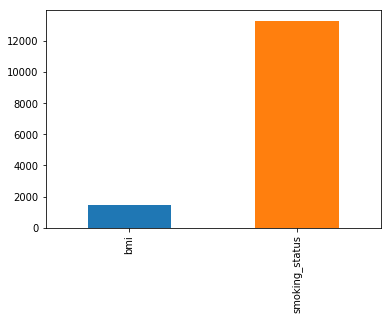

In [6]:
#to see missing values
missing = stroke_df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [ ]:
# Handle missing data 

#For  Smoking_status column, we can fill in the value with the "never smoked",for the sake of simplicity,(since that is the most common value):(since that is the most common value):
# another way that we can do is in the following:
    

In [7]:
# Handle missing data 

# Mean value for nan data in bmi column
stroke_df = stroke_df.fillna({'bmi': stroke_df['bmi'].mean()})

# Consider children as non smokers
stroke_df.loc[(stroke_df['smoking_status'].isnull()) & (stroke_df['age'] <=15), "smoking_status"] = "never smoked"

# Fill nan data in smoking_status column with the mode value in this column
stroke_df = stroke_df.fillna({'smoking_status' : stroke_df['smoking_status'].value_counts().index[0]})

# Check if there is no nan value (print 0 if there is no nan value)
print(stroke_df.isnull().values.sum())

0


In [8]:
# Make a dataframe for categorical features
cat_df = stroke_df.select_dtypes(include=['object']).copy()
cat_df.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,No,children,Rural,never smoked
1,Male,Yes,Private,Urban,never smoked
2,Female,No,Private,Urban,never smoked
3,Female,Yes,Private,Rural,formerly smoked
4,Male,No,Never_worked,Rural,never smoked


In [9]:
stroke_df['ever_married'].value_counts()

Yes    27938
No     15462
Name: ever_married, dtype: int64

In [10]:
stroke_df['work_type'].value_counts()

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64

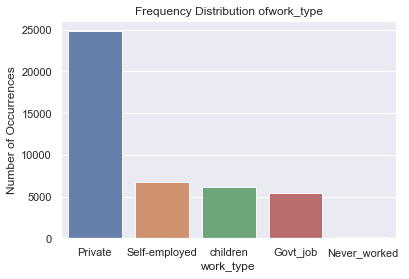

In [11]:
# A template to plot a barplot of the frequency distribution of a categorical feature
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
column_name = 'work_type'
feature_count = cat_df[column_name].value_counts()
sns.set(style="darkgrid")
sns.barplot(feature_count.index, feature_count.values, alpha=0.9)
plt.title('Frequency Distribution of' + column_name)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel(column_name, fontsize=12)
plt.show()

In [12]:
# Practice different ways of handling categorical data


# method #1: replace values

cat_df_replace = cat_df.copy()
for column in cat_df.columns:
    labels = cat_df[column].astype('category').cat.categories.tolist()
    replace_map_comp = {column : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

    print(replace_map_comp)

    cat_df_replace.replace(replace_map_comp, inplace=True)

cat_df_replace.head()

{'gender': {'Female': 1, 'Male': 2, 'Other': 3}}
{'ever_married': {'No': 1, 'Yes': 2}}
{'work_type': {'Govt_job': 1, 'Never_worked': 2, 'Private': 3, 'Self-employed': 4, 'children': 5}}
{'Residence_type': {'Rural': 1, 'Urban': 2}}
{'smoking_status': {'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}}


,gender,ever_married,work_type,Residence_type,smoking_status
0,2,1,5,1,2
1,2,2,3,2,2
2,1,1,3,2,2
3,1,2,3,1,1
4,2,1,2,1,2


In [13]:
# Practice different ways of handling categorical data


# method #2: label encoding

cat_df_lc = cat_df.copy()
for column in cat_df.columns:    
    cat_df_lc[column] = cat_df_lc[column].astype('category')
    cat_df_lc[column] = cat_df_lc[column].cat.codes
cat_df_lc.head()
# It seems faster than previous method

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,0,4,0,1
1,1,1,2,1,1
2,0,0,2,1,1
3,0,1,2,0,0
4,1,0,1,0,1


In [14]:
# Practice different ways of handling categorical data


# method #3: One-Hot encoding

cat_df_onehot = cat_df.copy()
for column in cat_df.columns:    
    cat_df_onehot = pd.get_dummies(cat_df_onehot, columns=[column], prefix = [column])

cat_df_onehot.head()
# The problem is many new columns!

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0
1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
2,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0
3,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0
4,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0


In [15]:
# Practice different ways of handling categorical data


# method #4: binary encoding
cat_df_be = cat_df.copy()

import category_encoders as ce

for column in cat_df.columns:
    
    encoder = ce.BinaryEncoder(cols=[column])
    cat_df_be = encoder.fit_transform(cat_df_be)
    print(column)

cat_df_be.head()



gender
ever_married
work_type
Residence_type
smoking_status


,smoking_status_0,smoking_status_1,smoking_status_2,Residence_type_0,Residence_type_1,work_type_0,work_type_1,work_type_2,work_type_3,ever_married_0,ever_married_1,gender_0,gender_1,gender_2
0,0,0,1,0,1,0,0,0,1,0,1,0,0,1
1,0,0,1,1,0,0,0,1,0,1,0,0,0,1
2,0,0,1,1,0,0,0,1,0,0,1,0,1,0
3,0,1,0,0,1,0,0,1,0,1,0,0,1,0
4,0,0,1,0,1,0,0,1,1,0,1,0,0,1


In [16]:
# Practice different ways of handling categorical data


# method #5: backward difference encoding
cat_df_bde = cat_df.copy()

import category_encoders as ce


for column in cat_df.columns:
    encoder = ce.BackwardDifferenceEncoder(cols=[column])
    cat_df_bde = encoder.fit_transform(cat_df_bde)
    cat_df_bde = cat_df_bde.drop(columns = ['intercept'])


cat_df_bde.head()

,gender_0,gender_1,ever_married_0,work_type_0,work_type_1,work_type_2,work_type_3,Residence_type_0,smoking_status_0,smoking_status_1
0,-0.666667,-0.333333,-0.5,-0.8,-0.6,-0.4,-0.2,-0.5,-0.666667,-0.333333
1,-0.666667,-0.333333,0.5,0.2,-0.6,-0.4,-0.2,0.5,-0.666667,-0.333333
2,0.333333,-0.333333,-0.5,0.2,-0.6,-0.4,-0.2,0.5,-0.666667,-0.333333
3,0.333333,-0.333333,0.5,0.2,-0.6,-0.4,-0.2,-0.5,0.333333,-0.333333
4,-0.666667,-0.333333,-0.5,0.2,0.4,-0.4,-0.2,-0.5,-0.666667,-0.333333


In [18]:
# Replace dataframe

df_cat_no = stroke_df.copy()
df_cat_no = df_cat_no.drop(columns = cat_df.columns)
df_cat_no = df_cat_no.join(cat_df_lc)
df_cat_no.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,30669,3.0,0,0,95.12,18.0,0,1,0,4,0,1
1,30468,58.0,1,0,87.96,39.2,0,1,1,2,1,1
2,16523,8.0,0,0,110.89,17.6,0,0,0,2,1,1
3,56543,70.0,0,0,69.04,35.9,0,0,1,2,0,0
4,46136,14.0,0,0,161.28,19.1,0,1,0,1,0,1


In [19]:
# New dataframe information
df_cat_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
avg_glucose_level    43400 non-null float64
bmi                  43400 non-null float64
stroke               43400 non-null int64
gender               43400 non-null int8
ever_married         43400 non-null int8
work_type            43400 non-null int8
Residence_type       43400 non-null int8
smoking_status       43400 non-null int8
dtypes: float64(3), int64(4), int8(5)
memory usage: 2.5 MB


In [20]:
#Checking of Linearity between features
from pandas import DataFrame

In [32]:
# relation of bmi and stroke
#relation of gloucoze level and bmi


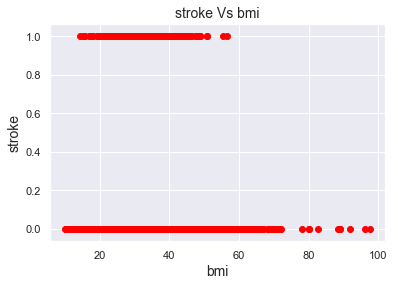

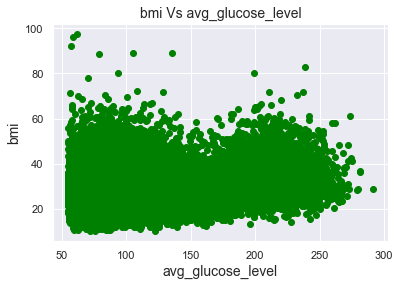

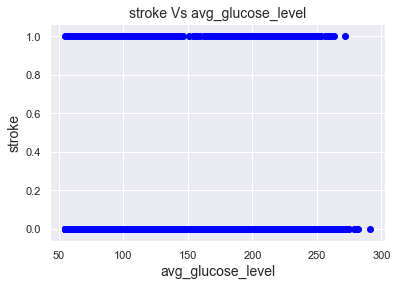

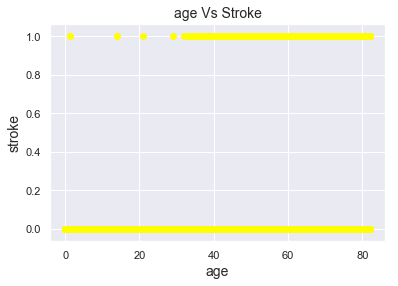

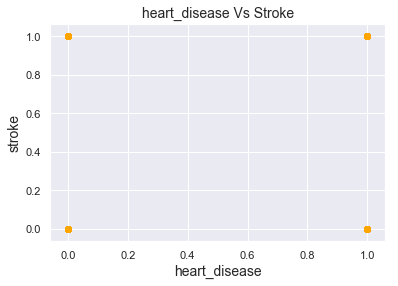

In [21]:
df = DataFrame(df_cat_no,columns=['bmi','avg_glucose_level','stroke', 'age','heart_disease','hypertension'])
 
plt.scatter(df['bmi'], df['stroke'], color='red')
plt.title('stroke Vs bmi', fontsize=14)
plt.xlabel('bmi', fontsize=14)
plt.ylabel('stroke', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(df['avg_glucose_level'], df['bmi'], color='green')
plt.title('bmi Vs avg_glucose_level', fontsize=14)
plt.xlabel('avg_glucose_level', fontsize=14)
plt.ylabel('bmi', fontsize=14)
plt.grid(True)
plt.show()


plt.scatter(df['avg_glucose_level'], df['stroke'], color='blue')
plt.title('stroke Vs avg_glucose_level', fontsize=14)
plt.xlabel('avg_glucose_level', fontsize=14)
plt.ylabel('stroke', fontsize=14)
plt.grid(True)
plt.show()


plt.scatter(df['age'], df['stroke'], color='yellow')
plt.title('age Vs Stroke', fontsize=14)
plt.xlabel('age', fontsize=14)
plt.ylabel('stroke', fontsize=14)
plt.grid(True)
plt.show()


plt.scatter(df['heart_disease'], df['stroke'], color='orange')
plt.title('heart_disease Vs Stroke', fontsize=14)
plt.xlabel('heart_disease', fontsize=14)
plt.ylabel('stroke', fontsize=14)
plt.grid(True)
plt.show()



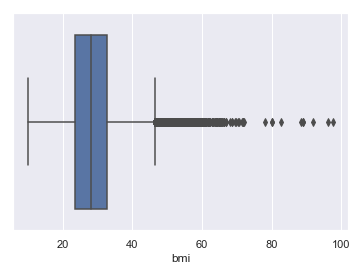

In [22]:
# check for outliers
import seaborn as sns
sns.boxplot(x=df_cat_no['bmi'])

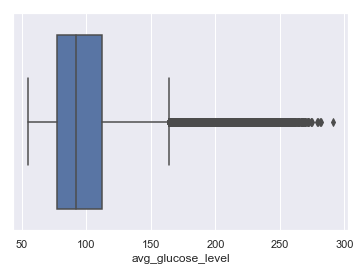

In [23]:
# check for outliers

sns.boxplot(x=df_cat_no['avg_glucose_level'])

In [24]:
# to see where stroke is 1
df_cat_no[df_cat_no.stroke==1]

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
63,9046,67.0,0,1,228.69,36.600000,1,1,1,2,1,0
81,51676,61.0,0,0,202.21,28.605038,1,0,1,3,0,1
141,31112,80.0,0,1,105.92,32.500000,1,1,1,2,0,1
257,60182,49.0,0,0,171.23,34.400000,1,0,1,2,1,2
264,1665,79.0,1,0,174.12,24.000000,1,0,1,3,0,1
288,56669,81.0,0,0,186.21,29.000000,1,1,1,2,1,0
291,53882,74.0,1,1,70.09,27.400000,1,1,1,2,0,1
320,10434,69.0,0,0,94.39,22.800000,1,0,0,2,1,1
407,27419,59.0,0,0,76.15,28.605038,1,0,1,2,0,1
426,60491,78.0,0,0,58.57,24.200000,1,0,1,2,1,1


In [48]:
# only 783 out of 43400 entries

In [25]:
# Apply PCA

# Extract features from dataframe
y = df_cat_no.loc[:, 'stroke'].values
features = df_cat_no.columns.tolist()
features.remove('stroke')
features.remove('id')
x = df_cat_no.loc[:, features].values

# Normalize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x = scaler.transform(x)

# PCA projection
from sklearn.decomposition import PCA

# See all components
pca = PCA()
principal_components = pca.fit_transform(x)
print(pca.explained_variance_ratio_)

pca = PCA(n_components = 10)
principal_components = pca.fit_transform(x)

columns_list = ['principal component '+str(i) for i in range(1,principal_components.shape[1]+1)]
principal_df = pd.DataFrame(data = principal_components
             , columns = columns_list)

principal_df.head()


[0.24888686 0.12022976 0.10059621 0.09900361 0.09424338 0.08917204
 0.08492442 0.07098339 0.06356366 0.02839668]


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,-2.963085,1.405514,-0.675999,0.680008,-0.421086,-0.344112,-0.119351,-0.322130,0.081171,-0.278292
1,1.984470,0.882798,1.089678,-0.160993,0.059726,-1.513400,-2.534160,0.729018,0.343136,-0.155962
2,-2.069432,-0.244912,0.693893,-0.673693,0.896918,0.187384,0.404681,0.112930,-1.313812,-0.249417
3,1.290581,-0.911080,-2.007964,-0.978675,-0.304934,0.285323,-0.177008,0.206251,0.769482,0.419718
4,-1.270106,0.817637,-0.428362,1.019045,-0.581003,-0.904811,0.992474,-0.127734,-2.182066,-0.130505


In [27]:
# Plot result of pca for no_comp=2

principal_df_plot = principal_df.copy()
principal_df_plot['stroke'] = y
principal_df_plot.head()



,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,stroke
0,-2.963085,1.405514,-0.675999,0.680008,-0.421086,-0.344112,-0.119351,-0.322130,0.081171,-0.278292,0
1,1.984470,0.882798,1.089678,-0.160993,0.059726,-1.513400,-2.534160,0.729018,0.343136,-0.155962,0
2,-2.069432,-0.244912,0.693893,-0.673693,0.896918,0.187384,0.404681,0.112930,-1.313812,-0.249417,0
3,1.290581,-0.911080,-2.007964,-0.978675,-0.304934,0.285323,-0.177008,0.206251,0.769482,0.419718,0
4,-1.270106,0.817637,-0.428362,1.019045,-0.581003,-0.904811,0.992474,-0.127734,-2.182066,-0.130505,0


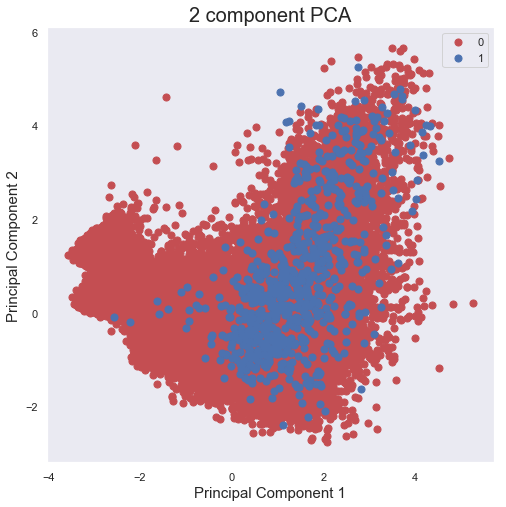

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = principal_df_plot['stroke'] == target
    ax.scatter(principal_df_plot.loc[indicesToKeep, 'principal component 1']
               , principal_df_plot.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [33]:
#1
# SVM Classifier
from sklearn import svm

x_data = principal_df.values
clf_svm = svm.SVC(gamma='scale')
clf_svm.fit(x_data, y)




SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
# it takes only some seconds to show the result of SVM

In [31]:
# Cross validation on training data

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

score_func = make_scorer(accuracy_score)
score = cross_val_score(clf_svm, x_data, y, scoring=score_func, cv=5)
print(score)

[0.98191453 0.98191453 0.98191244 0.98202558 0.98202558]


In [34]:
#2
# Logistic Regression
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0, solver='lbfgs')
clf_lr.fit(x_data, y)




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
#it was too fast

In [63]:
# Cross validation on training data

score = cross_val_score(clf_lr, x_data, y, scoring=score_func, cv=5)
print(score)

[0.98191453 0.98191453 0.98191244 0.98202558 0.98202558]


In [35]:
#3
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_data, y)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [65]:
# Cross validation on training data

score = cross_val_score(clf_dt, x_data, y, scoring=score_func, cv=5)
print(score)

[0.96256192 0.95968206 0.96451613 0.96186197 0.95909667]


In [36]:
# Evaluate models on train set
from sklearn.metrics import accuracy_score
y_pred_svm = clf_svm.predict(x_data)
y_pred_lr = clf_lr.predict(x_data)
y_pred_dt = clf_dt.predict(x_data)

acc_svm = accuracy_score(y, y_pred_svm)
acc_lr = accuracy_score(y, y_pred_lr)
acc_dt = accuracy_score(y, y_pred_dt)

print("svm: ", acc_svm)
print("logistic regression: ", acc_lr)
print("decision tree: ", acc_dt)

svm:  0.9819585253456221
logistic regression:  0.9819585253456221
decision tree:  1.0


In [91]:
# Test models on test data
# we can split our train data in order to have train and test data, or use the test data that we have without split.


# split data to test and train data
x = principal_df.iloc[:, :-1].values
y = principal_df.iloc[:, -1].values

# Spliting
# the final preprocessing step is to divide data into training and test sets. 
from sklearn.model_selection import train_test_split
xtrn, xtes, ytrn, ytes = train_test_split(x, y, test_size=0.2, random_state=123)



In [92]:
# but we use the test data that we have

In [37]:
# Test models on test data

# Load test data
test_df = pd.read_csv("data/test_2v.csv")
test_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [38]:
# Handle missing data 

# Mean value for nan data in bmi column
test_df = test_df.fillna({'bmi': test_df['bmi'].mean()})

# Consider children as non smokers
test_df.loc[(test_df['smoking_status'].isnull()) & (test_df['age'] <=15), "smoking_status"] = "never smoked"

# Fill nan data in smoking_status column with the mode value in this column
test_df = test_df.fillna({'smoking_status' : test_df['smoking_status'].value_counts().index[0]})

# Check if there is no nan value (print 0 if there is no nan value)
print(test_df.isnull().values.sum())

0


In [41]:
# Make a dataframe for categorical features
cat_test_df = test_df.select_dtypes(include=['object']).copy()
cat_test_df.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,formerly smoked
2,Female,No,children,Rural,never smoked
3,Male,No,Private,Urban,never smoked
4,Female,Yes,Govt_job,Rural,never smoked


In [44]:
# method #2 for test dataset

cat_df_lc= cat_test_df.copy()
for column in cat_df.columns:    
    cat_df_lc[column] = cat_df_lc[column].astype('category')
    cat_df_lc[column] = cat_df_lc[column].cat.codes
cat_df_lc.head()


,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,2,1,0
1,0,1,3,0,0
2,0,0,4,0,1
3,1,0,2,1,1
4,0,1,0,0,1


In [45]:
# Replace dataframe

test_df_cat_no = test_df.copy()
test_df_cat_no = test_df_cat_no.drop(columns = cat_test_df.columns)
test_df_cat_no = test_df_cat_no.join(cat_df_lc)
test_df_cat_no.head()



,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status
0,36306,80.0,0,0,83.84,21.1,1,1,2,1,0
1,61829,74.0,0,1,179.50,26.0,0,1,3,0,0
2,14152,14.0,0,0,95.16,21.2,0,0,4,0,1
3,12997,28.0,0,0,94.76,23.4,1,0,2,1,1
4,40801,63.0,0,0,83.57,27.6,0,1,0,0,1


In [46]:
# Apply PCA

# Extract features from dataframe
features = test_df_cat_no.columns.tolist()
features.remove('id')
x_test = test_df_cat_no.loc[:, features].values

# Normalize data
x_test = scaler.transform(x_test)

# PCA
test_principal_components = pca.fit_transform(x_test)

columns_list = ['principal component '+str(i) for i in range(1,principal_components.shape[1]+1)]
test_principal_df = pd.DataFrame(data = principal_components
                                 , columns = columns_list)

test_principal_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,-2.963085,1.405514,-0.675999,0.680008,-0.421086,-0.344112,-0.119351,-0.322130,0.081171,-0.278292
1,1.984470,0.882798,1.089678,-0.160993,0.059726,-1.513400,-2.534160,0.729018,0.343136,-0.155962
2,-2.069432,-0.244912,0.693893,-0.673693,0.896918,0.187384,0.404681,0.112930,-1.313812,-0.249417
3,1.290581,-0.911080,-2.007964,-0.978675,-0.304934,0.285323,-0.177008,0.206251,0.769482,0.419718
4,-1.270106,0.817637,-0.428362,1.019045,-0.581003,-0.904811,0.992474,-0.127734,-2.182066,-0.130505


In [47]:
#1
#Predict

# SVM Classifier

x_test_data = test_principal_df.values

y_test_pred_svm = clf_svm.predict(x_test_data)
print(y_test_pred_svm)


[0 0 0 ... 0 0 0]


In [108]:
#2
# Logistic Regression

y_test_pred_lr = clf_lr.predict(x_test_data)
print(y_test_pred_lr)

[0 0 0 ... 0 0 0]


In [109]:
#3
# Decision Tree

y_test_pred_dt = clf_dt.predict(x_test_data)
print(y_test_pred_dt)

[0 0 0 ... 0 0 0]
